In [273]:
import cv2
import numpy as np
import sys
import os

In [274]:
masked_image = np.array(cv2.imread("mask_image2.png"))
image_height, image_width, _ = masked_image.shape
lane_colors = np.unique(masked_image.reshape(-1, masked_image.shape[2]), axis=0)
lane_colors = lane_colors[lane_colors[:, 1] > 0]
lane_points = {}

for color in lane_colors:
    lane_points[str(color)] = np.argwhere(np.all(masked_image == color, axis=-1))
lane_points = {
    k : v for k, v in lane_points.items() if len(v) > 50
}
lane_colors = list(lane_points.keys())
for color in lane_colors:
    points = lane_points[str(color)]
    points = points[np.argsort(points[:, 1])]
    points[:, 0] = masked_image.shape[0] - points[:, 0]
    lane_curves[str(color)] = np.polyfit(points[:, 1], points[:, 0], 2)

center_line = [(image_width // 2, x) for x in range(image_height)]
center_line = np.array(center_line)

In [275]:
lane_curves

{'[  0 255   0]': array([ 2.46574422e-03, -2.36521771e+00,  5.67784603e+02]),
 '[125 125   0]': array([ 2.56165019e-04,  6.30862716e-01, -3.04254122e+01])}

In [283]:
lanepoints = [
    lanepoints[str(lane_color)]
    for lane_color in lane_colors
]
lanepoints

[array([[   0, -320],
        [   5, -309],
        [  10, -297],
        [  15, -285],
        [  20, -274],
        [  25, -263],
        [  30, -252],
        [  35, -241],
        [  40, -230],
        [  45, -219],
        [  50, -208],
        [  55, -198],
        [  60, -187],
        [  65, -177],
        [  70, -167],
        [  75, -157],
        [  80, -147],
        [  85, -137],
        [  90, -127],
        [  95, -118],
        [ 100, -108],
        [ 105,  -99],
        [ 110,  -90],
        [ 115,  -81],
        [ 120,  -72],
        [ 125,  -63],
        [ 130,  -54],
        [ 135,  -46],
        [ 140,  -37],
        [ 145,  -29],
        [ 150,  -21],
        [ 155,  -13],
        [ 160,   -5],
        [ 165,    2],
        [ 170,   10],
        [ 175,   17],
        [ 180,   25],
        [ 185,   32],
        [ 190,   39],
        [ 195,   46],
        [ 200,   53],
        [ 205,   60],
        [ 210,   67],
        [ 215,   73],
        [ 220,   80],
        [ 

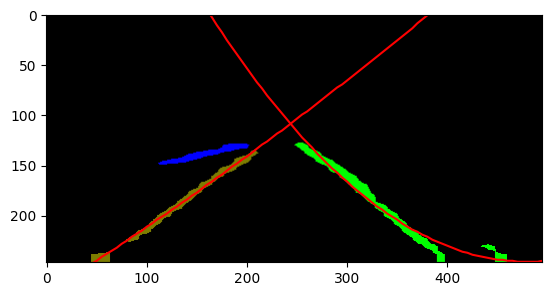

In [282]:
lanepoints = {}

for curve in lane_curves:
    x = np.linspace(0, image_width, 100)
    y = np.polyval(lane_curves[curve], x)
    y = image_height - y
    y = y.astype(int)
    x = x.astype(int)
    lanepoints[curve] = np.array(list(zip(x, y)))
    plt.plot(x, y, color='red')
plt.imshow(masked_image)

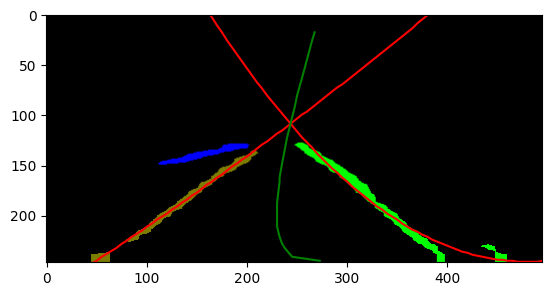

In [304]:
center_lanepoints = []
for y in range(image_height):
    left_x_for_y = None
    right_x_for_y = None
    for lane in lanepoints:
        for x, y_ in lane:
            if y_ == y:
                if x < image_width // 2:
                    left_x_for_y = x
                else:
                    right_x_for_y = x
    if left_x_for_y is not None and right_x_for_y is not None:
        center_lanepoints.append([left_x_for_y + (right_x_for_y - left_x_for_y) / 2, y])

center_lanepoints = np.array(center_lanepoints)
center_line = np.polyfit(center_lanepoints[:, 0], center_lanepoints[:, 1], 2)
plt.plot(lanepoints[0][:, 0], lanepoints[0][:, 1], color='red')
plt.plot(lanepoints[1][:, 0], lanepoints[1][:, 1], color='red')
plt.plot(center_lanepoints[:, 0], center_lanepoints[:, 1], color='green')
plt.imshow(masked_image)
plt.show()

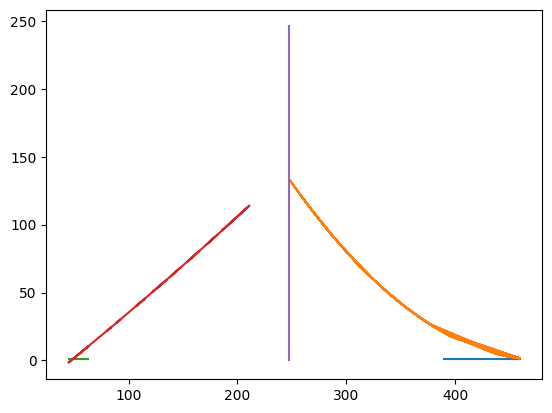

In [143]:
import matplotlib.pyplot as plt

for lane in lane_points:
    points = lane_points[lane]
    x = points[:,1]
    z = lane_curves[lane][0] * x ** 2 + lane_curves[lane][1] * x + lane_curves[lane][2]
    plt.plot(x,z, '-')

plt.plot(center_line[:,0], center_line[:,1], '-')
plt.show()

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def find_lane_points(mask_image):
    # Convert mask image to grayscale
    gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
    # Find lane points
    points = np.column_stack(np.where(gray > 0))
    return points

def fit_polynomial(points):
    # Fit a second-order polynomial to the lane points
    x = points[:, 1]
    y = points[:, 0]
    poly_params = np.polyfit(x, y, 2)
    return poly_params

def calculate_cte(poly_params, vehicle_position):
    # Calculate the cross track error
    x = vehicle_position[0]
    y = vehicle_position[1]
    # Polynomial value at vehicle's x position
    poly_value = np.polyval(poly_params, x)
    # CTE is the difference between the polynomial value and the vehicle's y position
    cte = y - poly_value
    return cte

def calculate_heading_angle(poly_params, vehicle_position):
    # Calculate the heading angle
    x = vehicle_position[0]
    # Derivative of the polynomial at vehicle's x position
    poly_derivative = np.polyder(poly_params)
    slope = np.polyval(poly_derivative, x)
    # Heading angle is the arctangent of the slope
    heading_angle = np.arctan(slope)
    return heading_angle

# Example usage
mask_image = cv2.imread("mask_image2.png")
image_height, image_width = mask_image.shape[:2]
vehicle_position = (image_width // 2, 0)

lane_points = find_lane_points(mask_image)
poly_params = fit_polynomial(lane_points)
cte = calculate_cte(poly_params, vehicle_position)
heading_angle = calculate_heading_angle(poly_params, vehicle_position)

print("Cross Track Error:", cte)
print("Heading Angle:", heading_angle)

Cross Track Error: -238.4535743227848
Heading Angle: 0.00010417623600526604
